<a href="https://colab.research.google.com/github/moralesluis26/Car_price_prediction/blob/main/Notebook_unico_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importación de datos y preparación.**
#### En esta sección se realizará la importación de los datos directamente desde Kaggle utilizando el archivo kaggle.json, y su preparación para el trabajo posterior, eliminando de forma aleatoria el 5% de la cantidad de datos y adicionando algunas filas de interés práctico que permitan el cumplimiento de los requisitos para trabajr con el dataframe. 

In [1]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle


In [3]:
cp kaggle.json ~/.kaggle/


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download hellbuoy/car-price-prediction


  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 16.7MB/s]


In [6]:
! unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [7]:
#Importanción de algunas librerias iniciales útiles para la modificación del dataset original.
import pandas as pd
import numpy as np
! pip install pd
di= pd.read_csv("CarPrice_Assignment.csv")
df = di.copy()
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
#! pip install kaggle (En ensayo por ahora)
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets download hellbuoy/car-price-prediction
#! unzip car-price-prediction.zip

#import pandas as pd
#np.read_csv("CarPrice_Assignment.csv")

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.shape

(205, 26)

In [11]:
dc=df.replace(['std','rwd','idi'], np.NaN) # Eliminación de ciertos valores del dataframe para generar los NaN.





In [12]:
n=dc.isnull().sum()
m=np.sum(dc.isnull().sum()) # verificación de los datos faltantes en el dataframe, el 5% corresponde a 308 datos.
print(n)

print('Total de datos faltantes=',m) # La cantidad de datos faltantes es de 358, por lo que cumple con el parámetro de por lo menos el 5% de datos faltantes

car_ID                0
symboling             0
CarName               0
fueltype              0
aspiration          168
doornumber            0
carbody               0
drivewheel           76
enginelocation        0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginetype            0
cylindernumber        0
enginesize            0
fuelsystem           20
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
dtype: int64
Total de datos faltantes= 264


In [13]:
# Adición de las 4 columnas faltantes del dataframe, quedando con las 30 columnas requeirdas.
log_pr = np.log(dc['peakrpm']) # Logaritmo natural de los valores de la columna 'peakrpm'
log_wb = np.log(dc['wheelbase']) # Logaritmo natural de los valores de la columna 'wheelbase'
sqrt_hp= dc['horsepower']**(1/2) # Raíz cuadrada de los valores de la columna 'horsepower'
exp_st= dc['stroke']**2 # Exponente al cuadrado de los valores de la columna 'stroke'
comp_nor= (df['compressionratio'] - df['compressionratio'].min()) / (df['compressionratio'].max() - df['compressionratio'].min()) # Normalizar los valores de la variable 'compressionratio' entre 0 y 1
ds1= dc.assign(Log_peakrpm=log_pr)
ds2= ds1.assign(Log_wheelbase=log_wb)
ds3= ds2.assign(Square_root_wp=sqrt_hp)
ds4= ds3.assign(Exp2_stroke=exp_st)
dsf= ds4.assign(Compressionratio_norm=comp_nor)

dsf # Dataframe listo para trabajar en los modelos predictivos


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,Log_peakrpm,Log_wheelbase,Square_root_wp,Exp2_stroke,Compressionratio_norm
0,1,3,alfa-romero giulia,gas,NaN,two,convertible,NaN,front,88.6,...,111,5000,21,27,13495.0,8.517193,4.484132,10.535654,7.1824,0.12500
1,2,3,alfa-romero stelvio,gas,NaN,two,convertible,NaN,front,88.6,...,111,5000,21,27,16500.0,8.517193,4.484132,10.535654,7.1824,0.12500
2,3,1,alfa-romero Quadrifoglio,gas,NaN,two,hatchback,NaN,front,94.5,...,154,5000,19,26,16500.0,8.517193,4.548600,12.409674,12.0409,0.12500
3,4,2,audi 100 ls,gas,NaN,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,8.612503,4.603168,10.099505,11.5600,0.18750
4,5,2,audi 100ls,gas,NaN,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,8.612503,4.599152,10.723805,11.5600,0.06250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,NaN,four,sedan,NaN,front,109.1,...,114,5400,23,28,16845.0,8.594154,4.692265,10.677078,9.9225,0.15625
201,202,-1,volvo 144ea,gas,turbo,four,sedan,NaN,front,109.1,...,160,5300,19,25,19045.0,8.575462,4.692265,12.649111,9.9225,0.10625
202,203,-1,volvo 244dl,gas,NaN,four,sedan,NaN,front,109.1,...,134,5500,18,23,21485.0,8.612503,4.692265,11.575837,8.2369,0.11250
203,204,-1,volvo 246,diesel,turbo,four,sedan,NaN,front,109.1,...,106,4800,26,27,22470.0,8.476371,4.692265,10.295630,11.5600,1.00000


In [14]:
dsf.to_csv( 'Dataframe_Work.csv',index=False )  #Con esta linea de código se guarda el dataframe en un archivo csv para trabajar con este de acá en adelante.

#**2.** **Descripción y preparación del dataframe**
#### En esta sección se mostrará la información respecto al dataframe, en cuanto a su contenido, datos faltantes y tipo de datos.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
ds=dsf.copy()

In [17]:
ds.shape # Dimensiones de los datos

(205, 31)

In [18]:
ds.info() #Información de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   fueltype               205 non-null    object 
 4   aspiration             37 non-null     object 
 5   doornumber             205 non-null    object 
 6   carbody                205 non-null    object 
 7   drivewheel             129 non-null    object 
 8   enginelocation         205 non-null    object 
 9   wheelbase              205 non-null    float64
 10  carlength              205 non-null    float64
 11  carwidth               205 non-null    float64
 12  carheight              205 non-null    float64
 13  curbweight             205 non-null    int64  
 14  enginetype             205 non-null    object 
 15  cylind

In [19]:
ds.describe() # Descripción de los datos

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,horsepower,peakrpm,citympg,highwaympg,price,Log_peakrpm,Log_wheelbase,Square_root_wp,Exp2_stroke,Compressionratio_norm
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,...,104.117073,5125.121951,25.219512,30.751220,13276.710571,8.537564,4.590874,10.042623,10.695588,0.196409
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,...,39.544167,476.985643,6.542142,6.886443,7988.852332,0.093747,0.059364,1.810743,1.983422,0.248253
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,8.330864,4.461300,6.928203,4.284900,0.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7788.000000,8.476371,4.548600,8.366600,9.672100,0.100000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5200.000000,24.000000,30.000000,10295.000000,8.556414,4.574711,9.746794,10.824100,0.125000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16503.000000,8.612503,4.628887,10.770330,11.628100,0.150000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,288.000000,6600.000000,49.000000,54.000000,45400.000000,8.794825,4.794964,16.970563,17.388900,1.000000


In [20]:
print('Cantidad de datos faltantes =',np.sum(ds.isnull().sum())) # Cantidad de datos faltantes, corresponden a un poco más del 5%

Cantidad de datos faltantes = 264


In [21]:
ds['CarName'] = ds['CarName'].replace({'maxda':'mazda','nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota','vokswagen': 'volkswagen', 'vw': 'volkswagen'})
ds['doornumber'] = (ds['doornumber'].replace({'four':4,'two':2})).astype(int)
ds # Se corrigen algunos de los datos de la columna 'CarName' 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,Log_peakrpm,Log_wheelbase,Square_root_wp,Exp2_stroke,Compressionratio_norm
0,1,3,alfa-romero giulia,gas,NaN,2,convertible,NaN,front,88.6,...,111,5000,21,27,13495.0,8.517193,4.484132,10.535654,7.1824,0.12500
1,2,3,alfa-romero stelvio,gas,NaN,2,convertible,NaN,front,88.6,...,111,5000,21,27,16500.0,8.517193,4.484132,10.535654,7.1824,0.12500
2,3,1,alfa-romero Quadrifoglio,gas,NaN,2,hatchback,NaN,front,94.5,...,154,5000,19,26,16500.0,8.517193,4.548600,12.409674,12.0409,0.12500
3,4,2,audi 100 ls,gas,NaN,4,sedan,fwd,front,99.8,...,102,5500,24,30,13950.0,8.612503,4.603168,10.099505,11.5600,0.18750
4,5,2,audi 100ls,gas,NaN,4,sedan,4wd,front,99.4,...,115,5500,18,22,17450.0,8.612503,4.599152,10.723805,11.5600,0.06250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,NaN,4,sedan,NaN,front,109.1,...,114,5400,23,28,16845.0,8.594154,4.692265,10.677078,9.9225,0.15625
201,202,-1,volvo 144ea,gas,turbo,4,sedan,NaN,front,109.1,...,160,5300,19,25,19045.0,8.575462,4.692265,12.649111,9.9225,0.10625
202,203,-1,volvo 244dl,gas,NaN,4,sedan,NaN,front,109.1,...,134,5500,18,23,21485.0,8.612503,4.692265,11.575837,8.2369,0.11250
203,204,-1,volvo 246,diesel,turbo,4,sedan,NaN,front,109.1,...,106,4800,26,27,22470.0,8.476371,4.692265,10.295630,11.5600,1.00000


In [22]:
del(ds["car_ID"]) #Eliminación de la columna "car_ID"
ds

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,Log_peakrpm,Log_wheelbase,Square_root_wp,Exp2_stroke,Compressionratio_norm
0,3,alfa-romero giulia,gas,NaN,2,convertible,NaN,front,88.6,168.8,...,111,5000,21,27,13495.0,8.517193,4.484132,10.535654,7.1824,0.12500
1,3,alfa-romero stelvio,gas,NaN,2,convertible,NaN,front,88.6,168.8,...,111,5000,21,27,16500.0,8.517193,4.484132,10.535654,7.1824,0.12500
2,1,alfa-romero Quadrifoglio,gas,NaN,2,hatchback,NaN,front,94.5,171.2,...,154,5000,19,26,16500.0,8.517193,4.548600,12.409674,12.0409,0.12500
3,2,audi 100 ls,gas,NaN,4,sedan,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,8.612503,4.603168,10.099505,11.5600,0.18750
4,2,audi 100ls,gas,NaN,4,sedan,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,8.612503,4.599152,10.723805,11.5600,0.06250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,NaN,4,sedan,NaN,front,109.1,188.8,...,114,5400,23,28,16845.0,8.594154,4.692265,10.677078,9.9225,0.15625
201,-1,volvo 144ea,gas,turbo,4,sedan,NaN,front,109.1,188.8,...,160,5300,19,25,19045.0,8.575462,4.692265,12.649111,9.9225,0.10625
202,-1,volvo 244dl,gas,NaN,4,sedan,NaN,front,109.1,188.8,...,134,5500,18,23,21485.0,8.612503,4.692265,11.575837,8.2369,0.11250
203,-1,volvo 246,diesel,turbo,4,sedan,NaN,front,109.1,188.8,...,106,4800,26,27,22470.0,8.476371,4.692265,10.295630,11.5600,1.00000


In [23]:
#H = np.random.randint(1,204,50)
H= (0, 173,  48, 118, 193,  68, 196, 104,  10,  22,  37,  88,  71,  89,
       141,  59, 194,  40,  88, 175,  89,  82, 166,  26,  78,  73,  10,
       149, 116, 198,  80, 176, 193,  83, 100, 178,  30, 148, 148, 143,
       168,  33, 194,  10, 186, 128,  33,  32, 203, 152, 164, 2)

       # Array aleatorio de 52 números, creado con el fin de eleiminar de forma aleatoria un conunto de datos. 

In [24]:
dsc=ds.copy()
dsc.loc[H,'doornumber']=np.nan

In [25]:
l=dsc.isnull().sum()
q=np.sum(dsc.isnull().sum()) # verificación de los datos faltantes en el dataframe, el 5% corresponde a 308 datos.
print(l)

print('Total de datos faltantes=',q)

symboling                  0
CarName                    0
fueltype                   0
aspiration               168
doornumber                44
carbody                    0
drivewheel                76
enginelocation             0
wheelbase                  0
carlength                  0
carwidth                   0
carheight                  0
curbweight                 0
enginetype                 0
cylindernumber             0
enginesize                 0
fuelsystem                20
boreratio                  0
stroke                     0
compressionratio           0
horsepower                 0
peakrpm                    0
citympg                    0
highwaympg                 0
price                      0
Log_peakrpm                0
Log_wheelbase              0
Square_root_wp             0
Exp2_stroke                0
Compressionratio_norm      0
dtype: int64
Total de datos faltantes= 308


In [26]:
# Adición de las 4 columnas faltantes del dataframe, quedando con las 30 columnas requeirdas.
log_pr = np.log(dsc['peakrpm']) # Logaritmo natural de los valores de la columna 'peakrpm'
log_wb = np.log(dsc['wheelbase']) # Logaritmo natural de los valores de la columna 'wheelbase'
sqrt_hp= dsc['horsepower']**(1/2) # Raíz cuadrada de los valores de la columna 'horsepower'
exp_st= dsc['stroke']**2 # Exponente al cuadrado de los valores de la columna 'stroke'
comp_nor= (df['compressionratio'] - df['compressionratio'].min()) / (df['compressionratio'].max() - df['compressionratio'].min()) # Normalizar los valores de la variable 'compressionratio' entre 0 y 1
ds1= dsc.assign(Log_peakrpm=log_pr)
ds2= ds1.assign(Log_wheelbase=log_wb)
ds3= ds2.assign(Square_root_wp=sqrt_hp)
ds4= ds3.assign(Exp2_stroke=exp_st)
ds= ds4.assign(Compressionratio_norm=comp_nor)




In [27]:
ds # Dataframe listo para trabajar en los modelos predictivos

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,Log_peakrpm,Log_wheelbase,Square_root_wp,Exp2_stroke,Compressionratio_norm
0,3,alfa-romero giulia,gas,NaN,NaN,convertible,NaN,front,88.6,168.8,...,111,5000,21,27,13495.0,8.517193,4.484132,10.535654,7.1824,0.12500
1,3,alfa-romero stelvio,gas,NaN,2.0,convertible,NaN,front,88.6,168.8,...,111,5000,21,27,16500.0,8.517193,4.484132,10.535654,7.1824,0.12500
2,1,alfa-romero Quadrifoglio,gas,NaN,NaN,hatchback,NaN,front,94.5,171.2,...,154,5000,19,26,16500.0,8.517193,4.548600,12.409674,12.0409,0.12500
3,2,audi 100 ls,gas,NaN,4.0,sedan,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,8.612503,4.603168,10.099505,11.5600,0.18750
4,2,audi 100ls,gas,NaN,4.0,sedan,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,8.612503,4.599152,10.723805,11.5600,0.06250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,NaN,4.0,sedan,NaN,front,109.1,188.8,...,114,5400,23,28,16845.0,8.594154,4.692265,10.677078,9.9225,0.15625
201,-1,volvo 144ea,gas,turbo,4.0,sedan,NaN,front,109.1,188.8,...,160,5300,19,25,19045.0,8.575462,4.692265,12.649111,9.9225,0.10625
202,-1,volvo 244dl,gas,NaN,4.0,sedan,NaN,front,109.1,188.8,...,134,5500,18,23,21485.0,8.612503,4.692265,11.575837,8.2369,0.11250
203,-1,volvo 246,diesel,turbo,NaN,sedan,NaN,front,109.1,188.8,...,106,4800,26,27,22470.0,8.476371,4.692265,10.295630,11.5600,1.00000


# **3. Limpieza de datos.**

In [28]:
ds["aspiration"]=ds.aspiration.fillna("Unk")
ds["drivewheel"]=ds.aspiration.fillna("Unk")
ds["fuelsystem"]=ds.aspiration.fillna("Unk")
ds["doornumber"]=ds.doornumber.fillna(int(np.mean(ds["doornumber"]))+1)
ds

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,Log_peakrpm,Log_wheelbase,Square_root_wp,Exp2_stroke,Compressionratio_norm
0,3,alfa-romero giulia,gas,Unk,4.0,convertible,Unk,front,88.6,168.8,...,111,5000,21,27,13495.0,8.517193,4.484132,10.535654,7.1824,0.12500
1,3,alfa-romero stelvio,gas,Unk,2.0,convertible,Unk,front,88.6,168.8,...,111,5000,21,27,16500.0,8.517193,4.484132,10.535654,7.1824,0.12500
2,1,alfa-romero Quadrifoglio,gas,Unk,4.0,hatchback,Unk,front,94.5,171.2,...,154,5000,19,26,16500.0,8.517193,4.548600,12.409674,12.0409,0.12500
3,2,audi 100 ls,gas,Unk,4.0,sedan,Unk,front,99.8,176.6,...,102,5500,24,30,13950.0,8.612503,4.603168,10.099505,11.5600,0.18750
4,2,audi 100ls,gas,Unk,4.0,sedan,Unk,front,99.4,176.6,...,115,5500,18,22,17450.0,8.612503,4.599152,10.723805,11.5600,0.06250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,Unk,4.0,sedan,Unk,front,109.1,188.8,...,114,5400,23,28,16845.0,8.594154,4.692265,10.677078,9.9225,0.15625
201,-1,volvo 144ea,gas,turbo,4.0,sedan,turbo,front,109.1,188.8,...,160,5300,19,25,19045.0,8.575462,4.692265,12.649111,9.9225,0.10625
202,-1,volvo 244dl,gas,Unk,4.0,sedan,Unk,front,109.1,188.8,...,134,5500,18,23,21485.0,8.612503,4.692265,11.575837,8.2369,0.11250
203,-1,volvo 246,diesel,turbo,4.0,sedan,turbo,front,109.1,188.8,...,106,4800,26,27,22470.0,8.476371,4.692265,10.295630,11.5600,1.00000


Nota: Los datos de las columnas "aspiration", "drivewheel" y "fuelsystem" contienen información muy específica de los autos que no necesariamente afecten o tengan una correlación con su precio, por lo cual los datos faltantes se llenaron con el dato "UnK" que siganifica Unknown o desconocido en español. Por esta razón se utilizarán otras variables para predecir el precio de los vehículos. En la columna "doornumber" los datos faltantes se completaron con su promedio, el cual dió de 3.14, pero debido a que el dato debe ser entero (ya que un carro comúnmente tiene un numero entero de puertas) se convirtió en entero, danto un valor de 3, a lo que se realiza una suma de 1 para así obtener un valor de 4. Esta decisión se debe a que los vehículos de 4 puertas son más comunes, por ello el promedio estaba más cerca a 4 que a 2.

In [29]:
l=ds.isnull().sum()
q=np.sum(ds.isnull().sum()) # verificación de que el dataset queda llimpio.
print(l)

print('Total de datos faltantes=',q)

symboling                0
CarName                  0
fueltype                 0
aspiration               0
doornumber               0
carbody                  0
drivewheel               0
enginelocation           0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginetype               0
cylindernumber           0
enginesize               0
fuelsystem               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
Log_peakrpm              0
Log_wheelbase            0
Square_root_wp           0
Exp2_stroke              0
Compressionratio_norm    0
dtype: int64
Total de datos faltantes= 0


En el código anterior se intenta convertir las letras a valor numérico, los four y two por 4 y 2.

# **4. Visualización de datos.**

Text(0.5, 0, 'Variable continua')

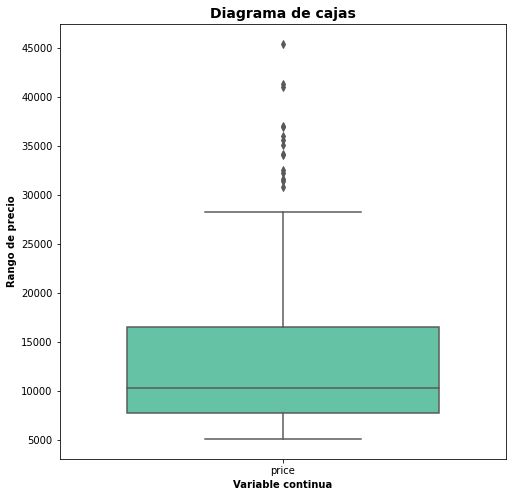

In [30]:
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=ds[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Diagrama de cajas", fontsize = 14, fontweight = 'bold')
plt.ylabel("Rango de precio", fontweight = 'bold')
plt.xlabel("Variable continua", fontweight = 'bold')
# Análisis de valores atípicos de la variable objetivo

 - Se evidencia que existen varios valores atípicos en la variable objetivo de los datos originales, ya que sobrepasan el bigote del valor máximo considerado para la gráfica de la caja. 

In [31]:
log_price = np.log(dc['price']) 

Text(0.5, 0, 'Variable continua')

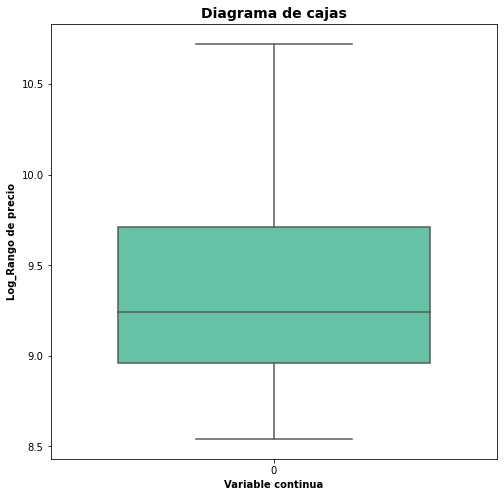

In [32]:
outliers = [log_price]
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Diagrama de cajas", fontsize = 14, fontweight = 'bold')
plt.ylabel("Log_Rango de precio", fontweight = 'bold')
plt.xlabel("Variable continua", fontweight = 'bold')

- Al aplicar una escala logarítma a los datos, se evicencia un estrechamiento de los mismos, por lo que desaparecen los valores atícos, tal como lo demuestra el gráfico de cajas anterior.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidad')

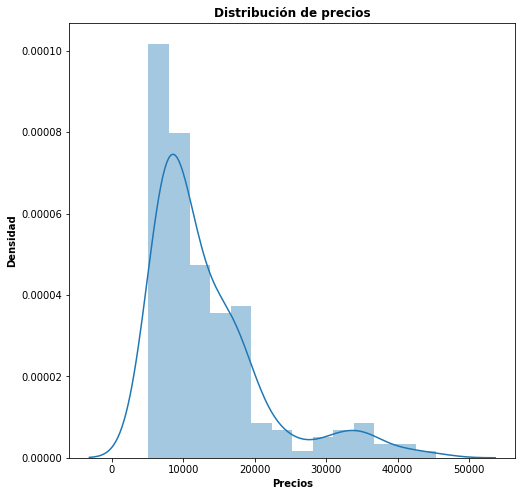

In [33]:
plt.figure(figsize=(8,8))

plt.title('Distribución de precios', fontweight = 'bold')
sns.distplot(ds['price'])
plt.xlabel("Precios", fontweight = 'bold')
plt.ylabel("Densidad", fontweight = 'bold')

- Con el gráfico de distribución de precios anterior, se puede determinar que es una distribución no tan abierta, en la cual se evidencia que la mayoría de vehículos poseen un precio inferior a 18000.

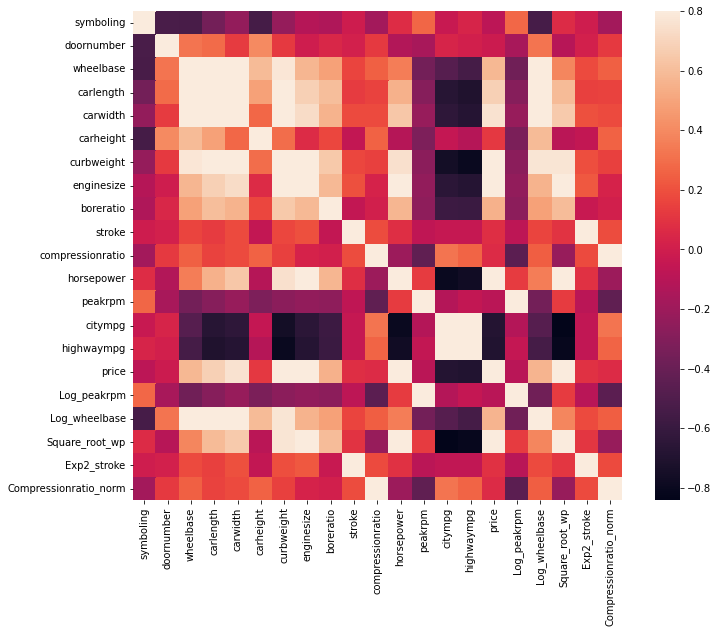

In [34]:
corrmat = ds.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

El gráfico anterior muestra la correlación entre las variables númericas del dataframe, en el cuál se evidencias varias cosas:
- La distancia entre ejes posee una alta relación con la longitud del vehículo, el ancho y la altura. En el siguiente gráfico se puede observar que entre mayor la separación de los ejes, mayores las demás dimensiones del vehículo, algo que tiene sentido ya que se requiere proporcionalidad en el vehículo, tanto por temás de funcionalidad como estéticos. El logarítmo de este valor posee las mismas correlaciones.

- El tamaño del motor también posee una correlación con las dimensiones del vehículo, pero su mayor relación esta con el peso y los caballos de fuerza. En el siguiente gráfico se evidencia que entre mayor el tamaño del motor, mayor peso y también una tendencia a incrementar la cantidad de caballos de fuerza.

- El precio, que es la variable de interés, está fuertemente relacionada con los caballos de fuerza, el tamaño del motor y las dimensiones del vehículo. En el sigueinte gráfico, se nota una tendencia de aumento de la variable precio en función a las anteriormente descritas. Mayores dimensiones del vehículo requieren un motor más grande debido a un mayor peso, y por enede mayor cantidad de caballos de fuerza y a su vez un incrmento en el precio. 

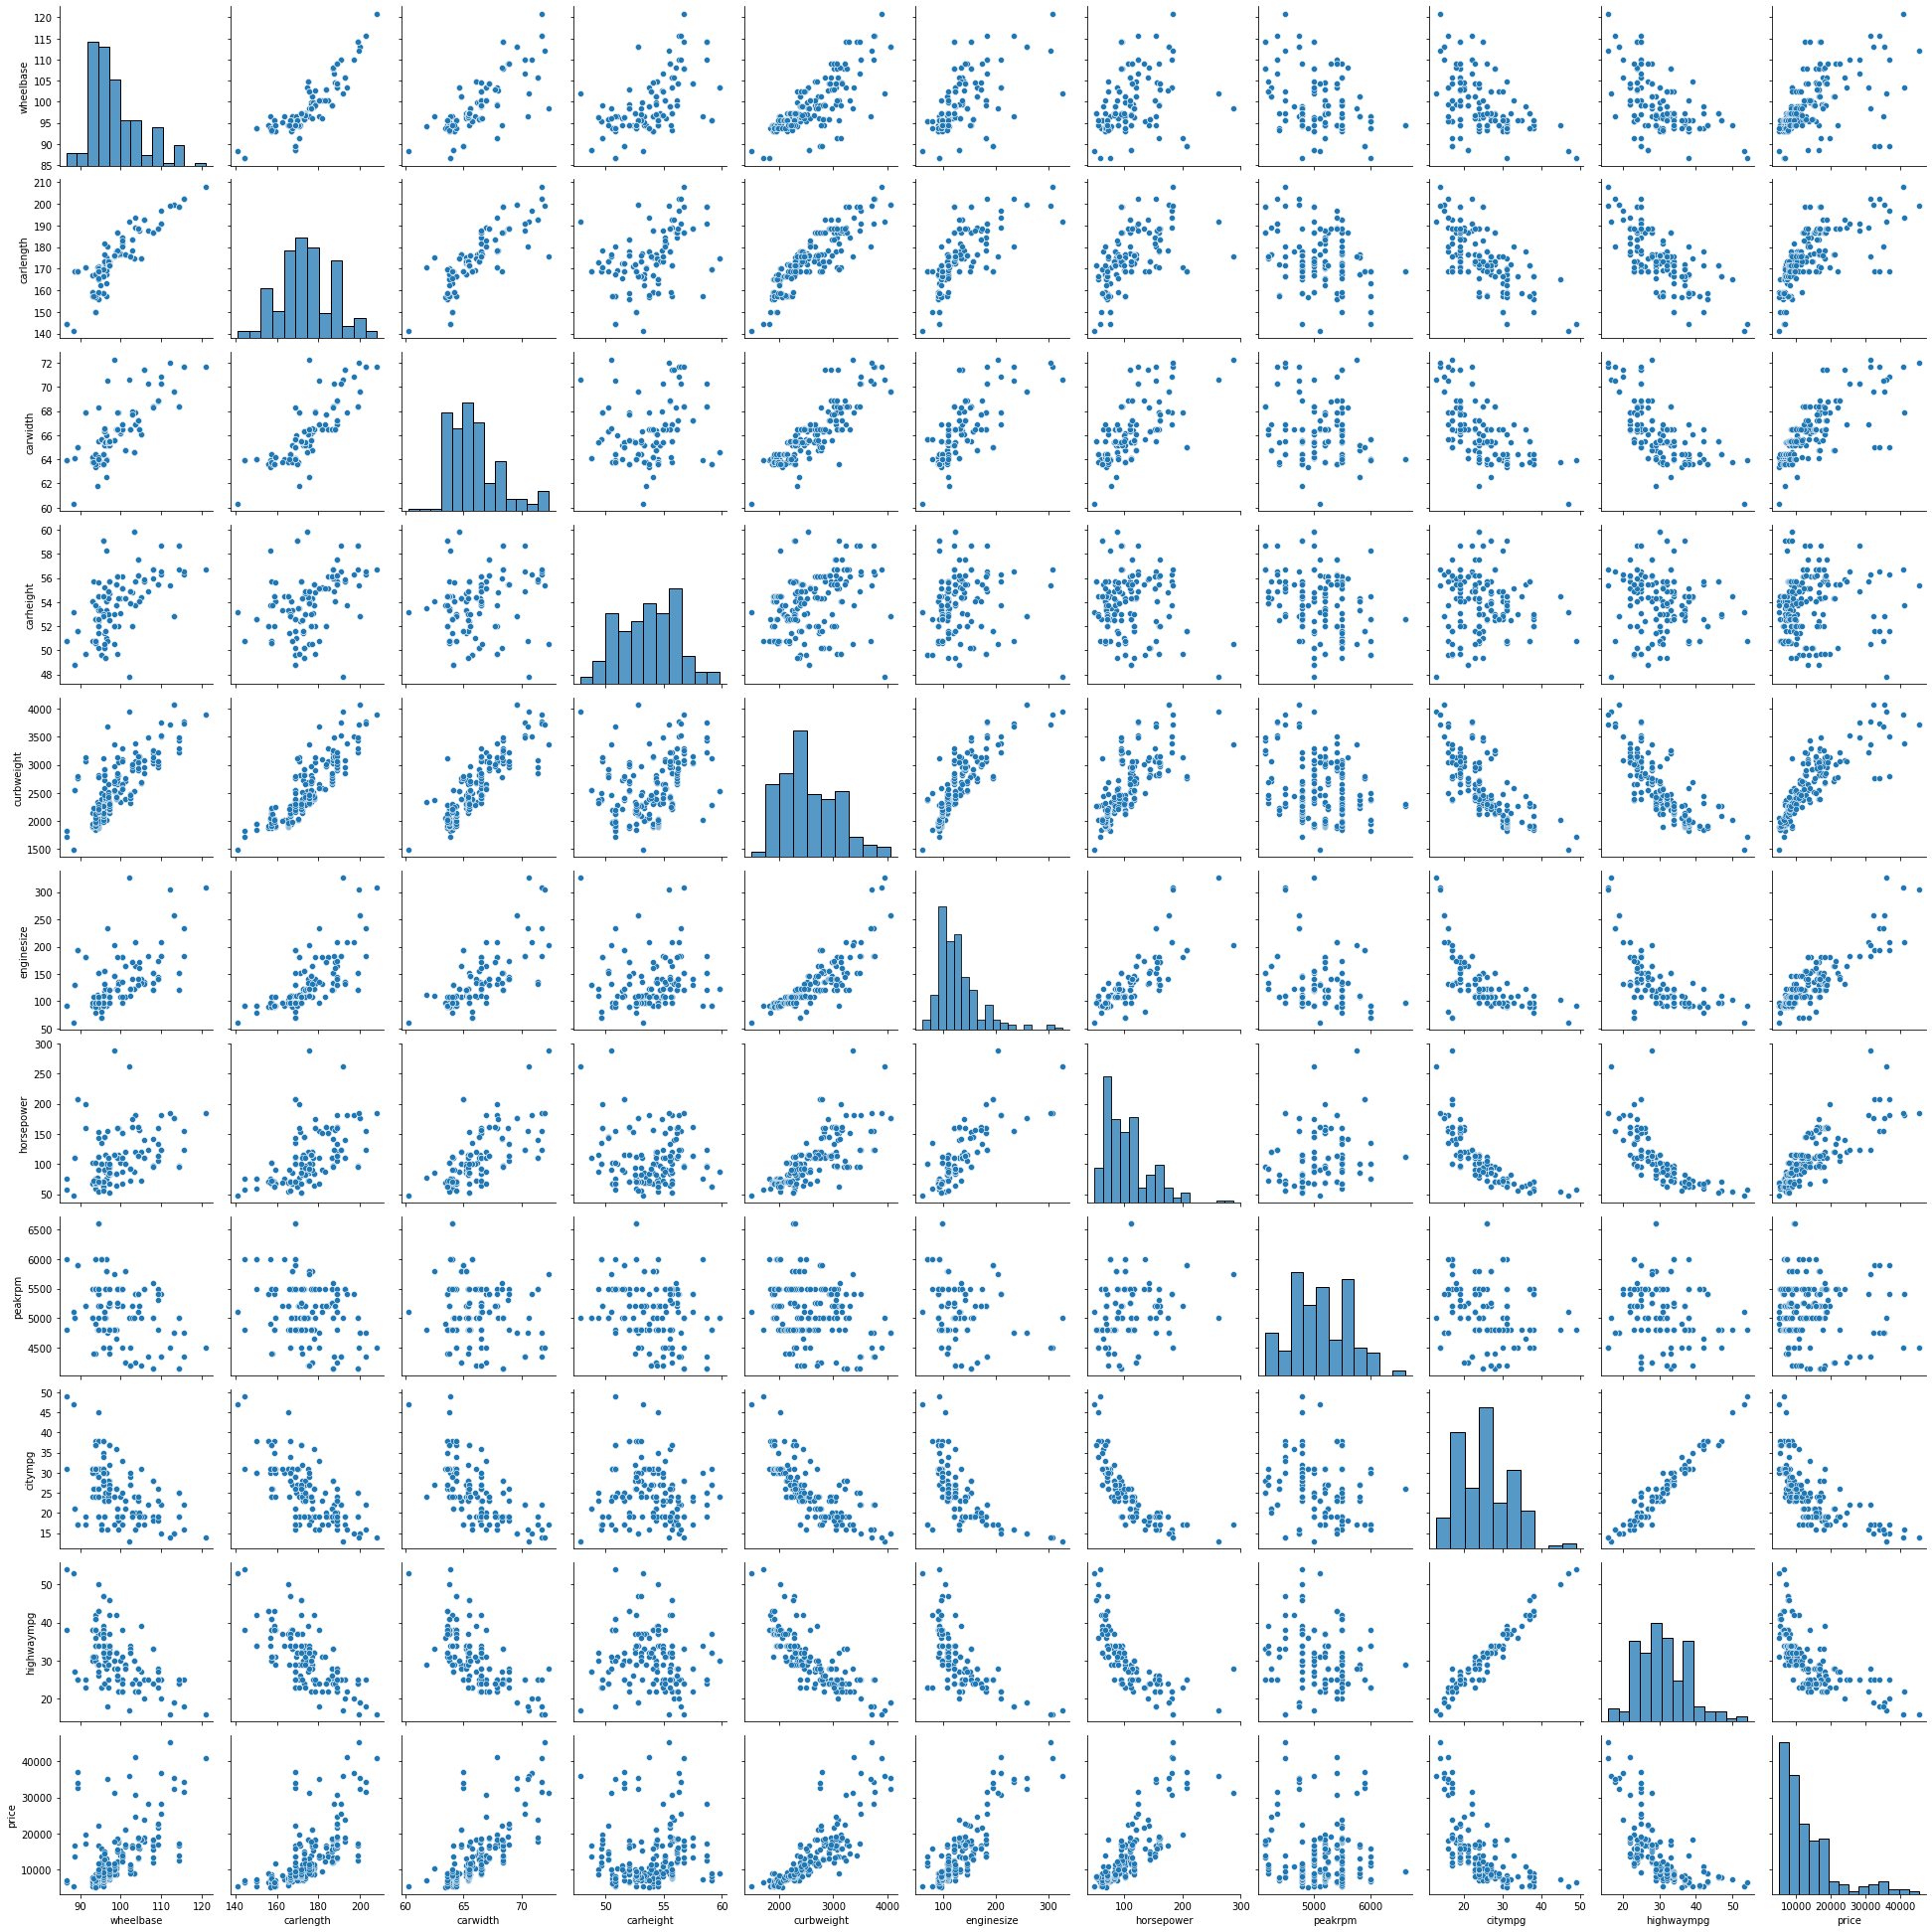

In [35]:
cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower','peakrpm','citympg','highwaympg','price']
ax = sns.pairplot(ds[cols])

En este gráfico se ven todas las correlaciones a mayor detalle de las variables de interés que puedan afectar el precio, tal como se mencionó en el gráfico anterior. Cuando los datos adoptan un grado de ordenamiento, se evidencia una tendencia a la formación de curvas.

# **5. Conversión y visualización de variables categóricas**



In [36]:
sig_cat_col = ['fueltype','carbody','drivewheel','enginetype','cylindernumber']

In [37]:
dummies = pd.get_dummies(ds[sig_cat_col])
dummies

,fueltype_diesel,fueltype_gas,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_Unk,drivewheel_turbo,enginetype_dohc,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
201,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
202,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
203,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
dt=ds.copy()

In [39]:
sig_cat_col_f = ['fueltype','carbody','drivewheel','enginetype','cylindernumber','Log_wheelbase','Log_peakrpm','Square_root_wp','Exp2_stroke','Compressionratio_norm','symboling','aspiration','drivewheel','fuelsystem','doornumber','carheight','stroke','compressionratio','peakrpm','citympg','highwaympg','CarName','enginelocation']
#Se eliminan algunas columnas que contienen información que es muy específica y no aporta mucho a la predicción y otras que no tiene una relación directa con la variable 'price'.

In [40]:
df_car = pd.concat([dt, dummies], axis = 1)
df_car.drop( (sig_cat_col_f), axis = 1, inplace = True)
df_car.shape

(205, 31)

In [41]:
df_car

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueltype_diesel,fueltype_gas,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,0,1,...,0,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,0,1,...,0,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,0,1,...,0,1,0,0,0,0,1,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,1,0,...,0,0,0,0,0,0,1,0,0,0


#**6. Separación y normalización de datos**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
#Algunas librerias de utilidad

In [43]:
np.random.seed(0)
df_train, df_test = train_test_split(df_car, train_size = 0.7, test_size = 0.3, random_state = 100)
#Separación de los datos de test y train, para realizar la estadarización y correlación solo con los datos de entrenamiento

In [44]:
df_train.shape

(143, 31)

In [45]:
df_test.shape

(62, 31)

In [46]:
cols= ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']


In [47]:
scaler = preprocessing.StandardScaler()
import warnings
warnings.filterwarnings("ignore")
df_train[cols] = scaler.fit_transform(df_train[cols])
#Normalización de las columnas 

In [48]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueltype_diesel,fueltype_gas,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.811836,-0.487238,-0.924500,-0.642128,-0.660242,-1.297329,-0.872898,-0.700201,0,1,...,0,0,0,0,0,1,0,0,0,0
125,-0.677177,-0.359789,1.114978,0.439415,0.637806,2.432256,1.021826,1.151929,0,1,...,0,0,0,0,0,1,0,0,0,0
166,-0.677177,-0.375720,-0.833856,-0.441296,-0.660242,-0.259197,0.238673,-0.452248,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.670284,-0.367754,-0.788535,0.015642,0.123485,0.625138,0.213410,0.442646,0,1,...,0,0,0,0,0,1,0,0,0,0
199,0.972390,1.225364,0.616439,1.137720,0.123485,1.201877,1.501822,0.757569,0,1,...,0,0,0,0,0,1,0,0,0,0


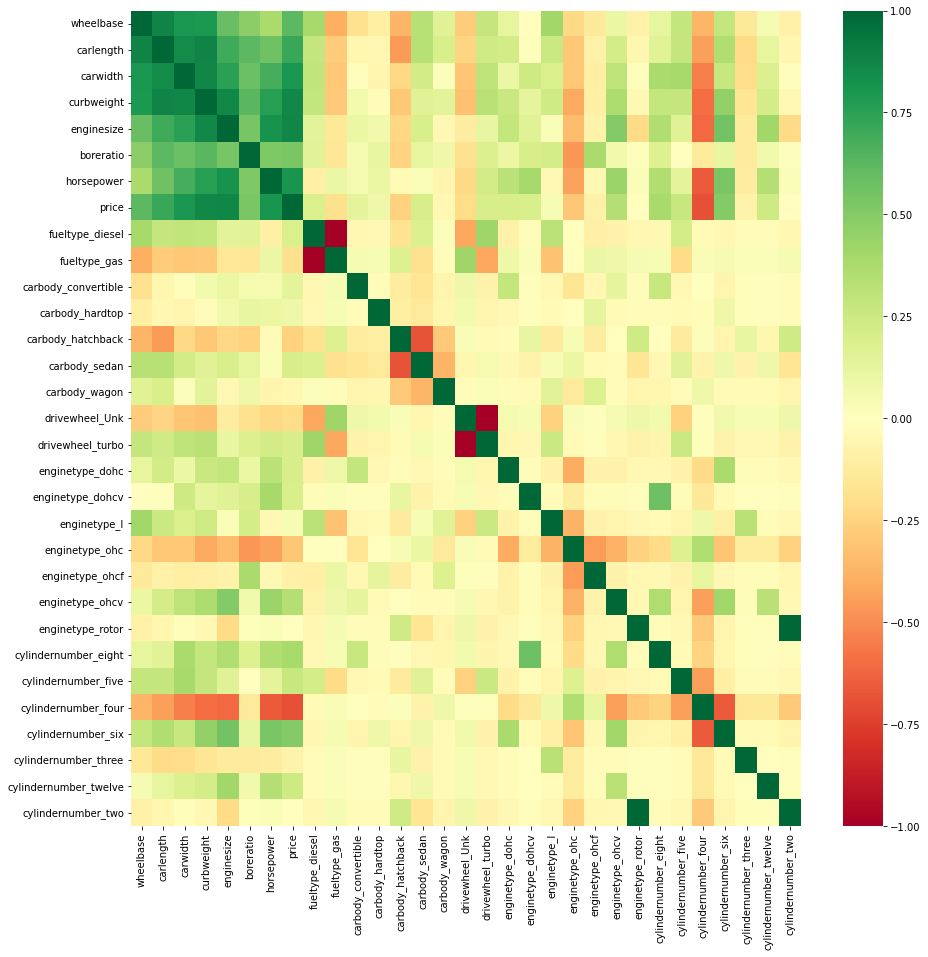

In [49]:

plt.figure(figsize = (15, 15))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

Nota: El gráfico anterior se realizó con base a los valores estandarizados de las variables que han presentado mayor correlación con el precio de los vehículos, y con las variables adicionales que se obtuvieron de las variables categóricas. De este se obtiene entonces que las variables que presetan una mayor correlación con el precio de los vehículos son: 'wheelbase' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'boreratio' ,'horsepower' ,'carbody_hatchback' ,'enginetype_ohcv'.

#**7. Modelos predictivos.**

In [50]:
cols= ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','carbody_hatchback' ,'enginetype_ohcv','price']

In [51]:
df_mo=df_car.copy()
df_mo=df_mo[cols]
df_mo # Este es el df que servirá para realizar los modelos 

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,carbody_hatchback,enginetype_ohcv,price
0,88.6,168.8,64.1,2548,130,3.47,111,0,0,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,0,0,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,1,1,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,0,0,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,0,0,16845.0
201,109.1,188.8,68.8,3049,141,3.78,160,0,0,19045.0
202,109.1,188.8,68.9,3012,173,3.58,134,0,1,21485.0
203,109.1,188.8,68.9,3217,145,3.01,106,0,0,22470.0


In [52]:
np.random.seed(0)
df_train, df_test = train_test_split(df_mo, train_size = 0.7, test_size = 0.3, random_state = 100)
#Separación de los datos de test y train

In [53]:
df_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,carbody_hatchback,enginetype_ohcv,price
122,93.7,167.3,63.8,2191,98,2.97,68,0,0,7609.0
125,94.5,168.9,68.3,2778,151,3.94,143,1,0,22018.0
166,94.5,168.7,64.0,2300,98,3.24,112,1,0,9538.0
1,88.6,168.8,64.1,2548,130,3.47,111,0,0,16500.0
199,104.3,188.8,67.2,3157,130,3.62,162,0,0,18950.0
...,...,...,...,...,...,...,...,...,...,...
87,96.3,172.4,65.4,2403,110,3.17,116,0,0,9279.0
103,100.4,184.6,66.5,3060,181,3.43,152,0,1,13499.0
67,110.0,190.9,70.3,3515,183,3.58,123,0,0,25552.0
24,93.7,157.3,63.8,1967,90,2.97,68,1,0,6229.0


In [54]:
df_test.shape

(62, 10)

In [55]:
ytr = df_train.pop('price')
Xtr = df_train

In [56]:
yts = df_test.pop('price')
Xts = df_test

In [77]:
#X = df_mo.values[:,:-1]
#y = df_mo["price"].values
#print (X.shape, y.shape) #Aún no están en uso estos datos particionados de esta forma.

In [57]:
lr = LinearRegression()
lr.fit(Xtr, ytr)
lr.score(Xtr, ytr), lr.score(Xts, yts)

(0.8462975550082843, 0.8182875710609149)

Nota: este es el primer modelo predictivo, el cual se basa en un modelo lineal simple y se observa que el R^2 correpondiente a los datos de test es bueno (aproximado a 1), lo que indica que hay una buena predección por el modelo, sin embargo es posible mejorarlo.